In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
df = pd.read_csv('data_training1.txt')
len(df)

4500

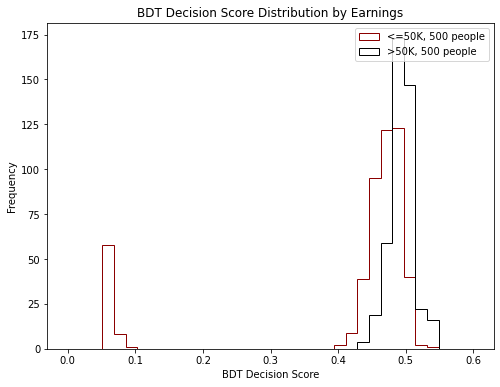

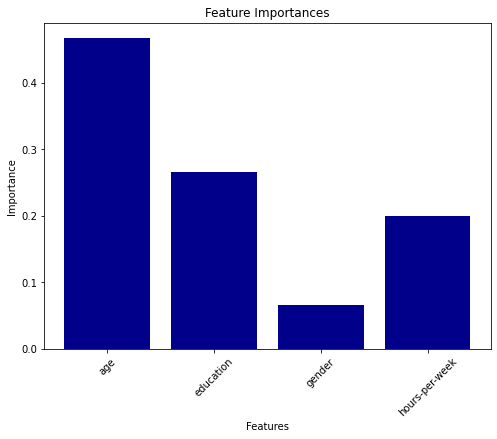

In [268]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('data_training1.txt')

# Convert earnings to binary labels (0 for <=50K, 1 for >50K)
df['earning'] = df['earning'].map({' <=50K': 0, ' >50K': 1})

# Extract features and labels
X = df[['age', 'education', 'gender', 'hours-per-week']]
#X = df[['age', 'education']]
y = df['earning']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Initialize AdaBoost classifier with DecisionTreeClassifier as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Stump
n_estimators = 15 # Number of weak learners
learning_rate = 1  # Weight applied to each classifier
adaboost_clf = AdaBoostClassifier(base_estimator=base_estimator,
                                   n_estimators=n_estimators,
                                   learning_rate=learning_rate)


adaboost_clf.fit(X_train, y_train)


decision_scores = adaboost_clf.predict_proba(X_test)[:, 1]


plt.figure(figsize=(8, 6))
plt.hist(decision_scores[y_test == 0][0:500],histtype='step', bins=35, range = (0,0.6), color='darkred', alpha=1, label='<=50K, 500 people')



plt.hist(decision_scores[y_test == 1][0:500], histtype='step' ,bins=35, color='black', range=(0,0.6), alpha=1, label='>50K, 500 people')

plt.xlabel('BDT Decision Score')
plt.ylabel('Frequency')
plt.title('BDT Decision Score Distribution by Earnings')
plt.legend()

plt.show()
feature_importances = adaboost_clf.feature_importances_

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(X.columns, feature_importances, color='darkblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()






,age,education,gender,hours-per-week
615,39,9,0,60
642,21,10,0,40
4199,18,8,1,25
3513,37,10,0,40
3605,17,6,1,20
...,...,...,...,...
2743,30,9,0,40
2214,64,9,0,40
4115,34,10,0,40
2833,58,15,0,50


In [269]:
#calc total accuracy of the model
mask = decision_scores > 0.525
y = y_test[mask]
accuracy = np.sum(y) / len(y)
print('Accuracy:', accuracy)
precision = np.sum(y)/np.sum(y_test)
precision


Accuracy: 0.8285714285714286


0.0659090909090909

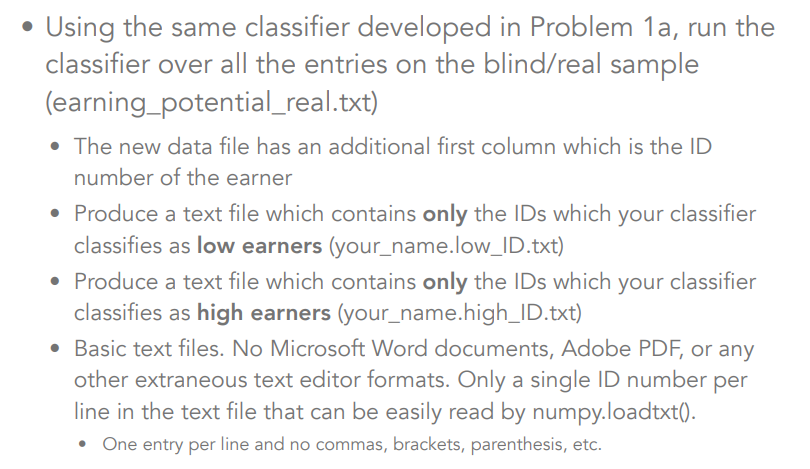

In [281]:
df['ID']

0          0
1          1
2          2
3          3
4          4
        ... 
3607    3607
3608    3608
3609    3609
3610    3610
3611    3611
Name: ID, Length: 3612, dtype: int64

In [286]:

df = pd.read_csv('analisis data set.txt')
X_unknown = X = df[['age', 'education', 'gender', 'hours-per-week']]

decision_scores_unknown = adaboost_clf.predict_proba(X_unknown)[:, 1]
mask = decision_scores_unknown > 0.525
id_numbers = df['ID'][mask]
#id_numbers.to_csv('id_numbers.txt', index=False)
id_numbers.to_csv('id_numbers_highearners.txt', index=False)

mask2 = decision_scores_unknown < 0.525
id_numbers2 = df['ID'][mask2]
id_numbers2.to_csv('id_numbers_lowearners.txt', index=False)